In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve,f1_score, plot_confusion_matrix, ConfusionMatrixDisplay

from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import RobustScaler, QuantileTransformer

from imblearn.over_sampling import SMOTE
import joblib

#My own libraries
import RssUtils

%matplotlib inline

First idea is to load the dataset, we do this by using the pandas librarie reading the csv file

In [18]:
dfRaw = pd.read_csv("data/cs-training.csv").set_index('Unnamed: 0')
dfRaw.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Now we check for missing values
There is a couple of missing values in the dataset, the variable "MonthlyIncome" has almost 20% of missing values
i'm gonna treat them

In [19]:
dfNA = pd.DataFrame(dfRaw.isna().sum(), columns = ['coluna'])
dfNA['Percent'] = dfNA['coluna']/dfRaw.shape[0]*100
dfNA

,coluna,Percent
SeriousDlqin2yrs,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,29731,19.820667
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


In [20]:
dfRaw[dfRaw['MonthlyIncome'].isna()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,
7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
42,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149977,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149978,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149985,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0


We can see in the line below that this is a lot umbalanced dataset, we might also need to add some technique to oversample the umbalanced data

<AxesSubplot:>

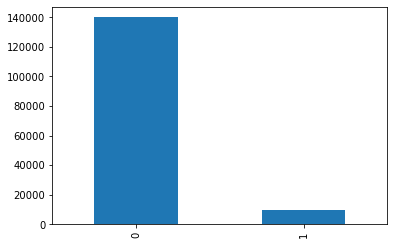

In [21]:
dfRaw["SeriousDlqin2yrs"].value_counts().plot(kind = 'bar')

In [22]:
colunas = dfRaw.columns

As we have almost 20% missing values we cannot simple delete those entries, however there are a lot of ways to impute those values
One of these ways is the KNNImputer available in the scikit-learn library

In [ ]:
imputer = KNNImputer()
dfImputed = pd.DataFrame(imputer.fit_transform(dfRaw), columns=colunas)

Now we've get rid of the missing values

In [8]:
dfImputed.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [23]:
# as the process to impute values takes some time it makes sense for us to save the result so that we don't need to run the algorith again
dfImputed.to_csv('data/dfImputed.csv')

In [24]:
dfImputed.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [2]:
#As well as to load the dataset without the missing values
dfImputed = pd.read_csv("data/dfImputed.csv").set_index('Unnamed: 0')
dfImputed.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,
0,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='MonthlyIncome'>

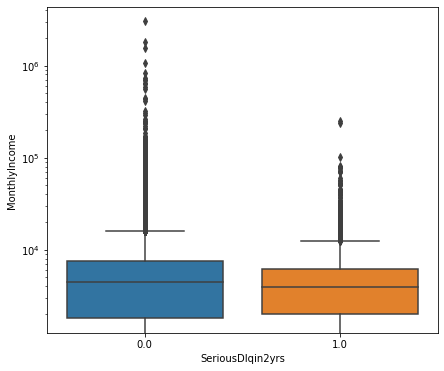

In [26]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.boxplot(x = "SeriousDlqin2yrs", y = 'MonthlyIncome', data = dfImputed)

In [27]:
dfImputed['NumberOfDependents'].unique()

array([ 2. ,  1. ,  0. ,  3. ,  0.2,  4. ,  5. ,  0.4,  1.4,  0.8,  6. ,
        0.6,  8. ,  7. ,  1.2, 20. , 10. ,  1.6,  1.8,  2.2,  9. ,  2.6,
       13. ,  2.4])

In [28]:
dfDependentIncome = dfImputed.groupby('NumberOfDependents')['NumberOfOpenCreditLinesAndLoans'].mean()
dfDependentIncome.sort_index()

NumberOfDependents
0.0      8.083385
0.2      5.680292
0.4      6.259740
0.6      6.771331
0.8      6.965714
1.0      9.160644
1.2      7.215385
1.4      8.264151
1.6      7.730769
1.8      8.000000
2.0      9.029797
2.2      9.000000
2.4     16.000000
2.6      2.000000
3.0      8.938416
4.0      8.966108
5.0      8.979893
6.0      8.753165
7.0      8.196078
8.0      7.416667
9.0      9.800000
10.0     7.400000
13.0     3.000000
20.0    11.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='age'>

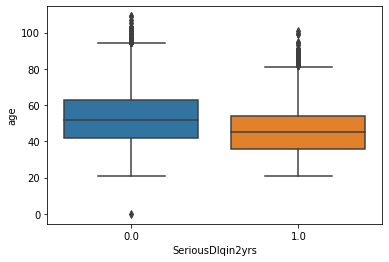

In [29]:
sns.boxplot(x = 'SeriousDlqin2yrs', y = 'age', data = dfImputed)

In [31]:
dfIdades = dfImputed[['SeriousDlqin2yrs','age']].copy()
dfIdades['Faixa']  = dfIdades.age.map(RssUtils.SeparaFaixaIdade)
dfIdades.head()

,SeriousDlqin2yrs,age,Faixa
Unnamed: 0,,,
0,1.0,45.0,45..55
1,0.0,40.0,35..45
2,0.0,38.0,35..45
3,0.0,30.0,25..35
4,0.0,49.0,45..55


In [32]:
dfIdadeAgrupado = pd.DataFrame(dfIdades.groupby('Faixa')['SeriousDlqin2yrs'].value_counts())
dfIdadeAgrupado.rename(columns={'SeriousDlqin2yrs':'Contagem'}, inplace=True)
#dfIdadeAgrupado.reset_index(level = "SeriousDlqin2yrs", inplace=True)
dfIdadeAgrupado.reset_index(inplace=True)
dfIdadeAgrupado = dfIdadeAgrupado[dfIdadeAgrupado['Faixa']!= 'Faixa 0..15']
dfIdadeAgrupado

,Faixa,SeriousDlqin2yrs,Contagem
0,15..25,0.0,1857
1,15..25,1.0,217
2,25..35,0.0,15232
3,25..35,1.0,1933
4,35..45,0.0,25978
5,35..45,1.0,2585
6,45..55,0.0,33926
7,45..55,1.0,2850
8,55..65,0.0,32569
9,55..65,1.0,1659


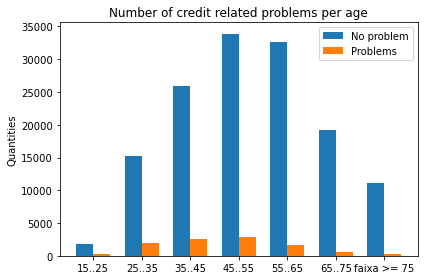

In [34]:
labels = dfIdadeAgrupado.Faixa.unique()
count0 = dfIdadeAgrupado[dfIdadeAgrupado['SeriousDlqin2yrs'] == 0.0]['Contagem'].values
count1 = dfIdadeAgrupado[dfIdadeAgrupado['SeriousDlqin2yrs'] == 1.0]['Contagem'].values

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count0, width, label = "No problem")
rects2 = ax.bar(x + width/2, count1, width, label = "Problems")

ax.set_ylabel('Quantities')
ax.set_title('Number of credit related problems per age')
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=labels)
ax.legend()

fig.tight_layout()

plt.show()

In [35]:
dfImputed.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [3]:
dfImputed.shape

(150000, 11)

In [37]:
dfAmostra = dfImputed.copy().sample(frac=0.001)

In [38]:
dfAmostra.shape

(150, 11)

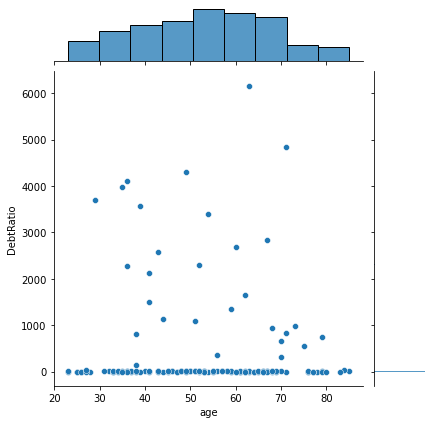

In [39]:
sns.jointplot(data=dfAmostra, x="age", y="DebtRatio")

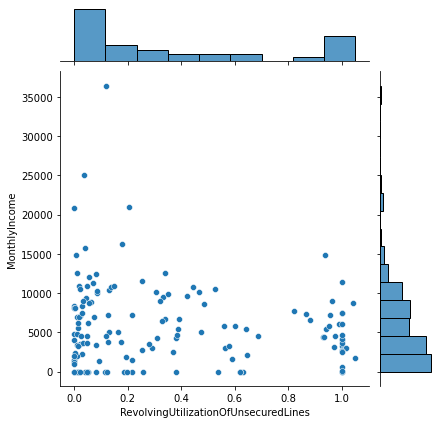

In [6]:
sns.jointplot(data=dfAmostra, x="RevolvingUtilizationOfUnsecuredLines", y="MonthlyIncome")

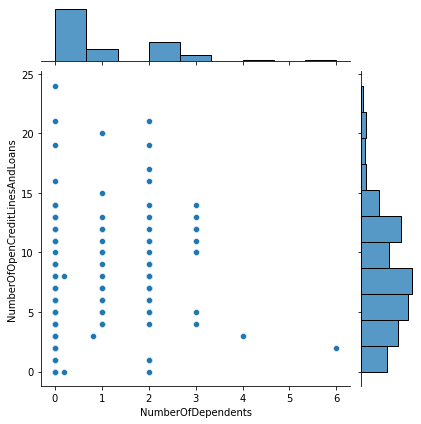

In [7]:
sns.jointplot(data=dfAmostra, x="NumberOfDependents", y="NumberOfOpenCreditLinesAndLoans")

<Figure size 1080x648 with 0 Axes>

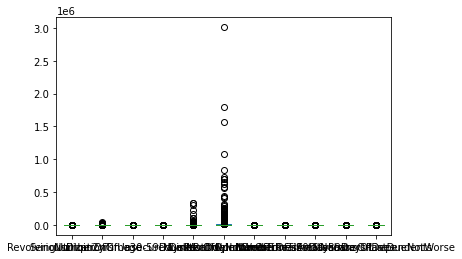

In [40]:
plt.figure(figsize=(15,9))
dfImputed.plot(kind = "box")
plt.show()

In [3]:
X = dfImputed.drop(columns=['SeriousDlqin2yrs'])
y = dfImputed.SeriousDlqin2yrs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
modelRF = RandomForestClassifier()
modelRF.fit(X = X_train, y = y_train)

RandomForestClassifier()

In [43]:
X_test.shape

(45000, 10)

C:\Users\Rodrigo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


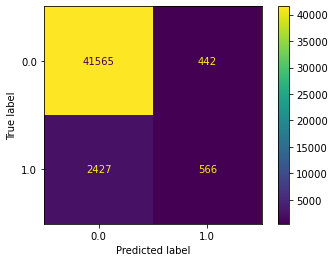

In [44]:
predRF = modelRF.predict(X_test)
plot_confusion_matrix(modelRF, X = X_test,y_true=y_test)

Above we have the confusion matrix for the first model created, it does not show a good performance.
If we try to measure the accuracy it will not be a bad one, however as we are talking about an umbalanced dataset there is some extra care we have to take care
which is shown by both the confusion matrix and the F1Score

In [26]:
modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)

C:\Users\Rodrigo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

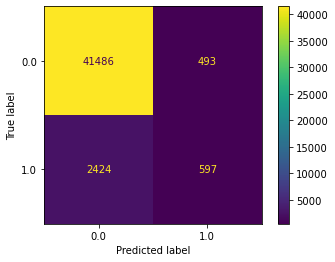

In [27]:
predXGB = modelXGB.predict(X_test)
plot_confusion_matrix(modelXGB,X_test,y_test)

In [5]:
X = dfImputed.drop(columns=['SeriousDlqin2yrs'])
y = dfImputed.SeriousDlqin2yrs

sm = SMOTE()
X_res, y_res = sm.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)

C:\Users\RodrigoS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


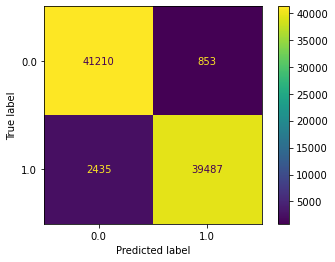

In [6]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train,y_train)
plot_confusion_matrix(modelRF, X_test, y_test)

In [7]:
predRF = modelRF.predict(X_test)
print(accuracy_score(y_test,predRF))
print(f1_score(y_test,predRF))
nonScaledF1 = f1_score(y_test,predRF)

0.9608501518128237
0.9600301475772532


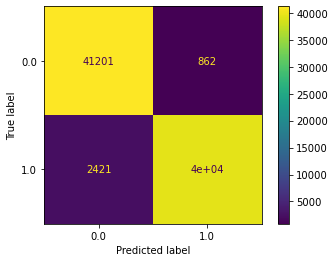

In [8]:
scaler = RobustScaler(quantile_range = (5.0,95.0)).fit(X_train)
X_Scaled = scaler.transform(X_train)

modelRFScaled = RandomForestClassifier()
modelRFScaled.fit(X_Scaled, y_train)

X_testScaled = scaler.transform(X_test)

ConfusionMatrixDisplay.from_estimator(modelRFScaled,X_testScaled, y_test)

C:\Users\Rodrigo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


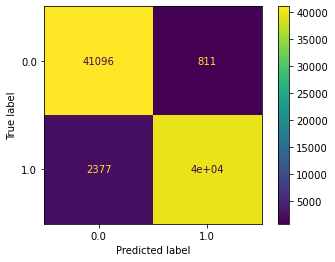

In [14]:
scaler = QuantileTransformer().fit(X_train)
X_Scaled = scaler.transform(X_train)

modelRFScaled = RandomForestClassifier()
modelRFScaled.fit(X_Scaled, y_train)

X_testScaled = scaler.transform(X_test)

plot_confusion_matrix(modelRFScaled,X_testScaled, y_test)

C:\Users\Rodrigo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rodrigo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


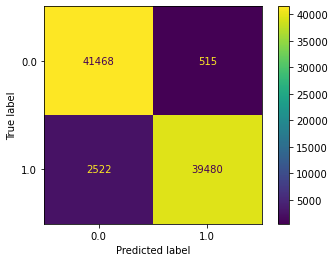

In [5]:
scaler = QuantileTransformer().fit(X_train)
X_Scaled = scaler.transform(X_train)

modelRFScaled = XGBClassifier()
modelRFScaled.fit(X_Scaled, y_train)

X_testScaled = scaler.transform(X_test)

plot_confusion_matrix(modelRFScaled,X_testScaled, y_test)

In [9]:
param_test1 = {
 'max_depth':[3,4,5,6,7],
 'min_child_weight':[1,2,3]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',  scale_pos_weight=1, seed=27, use_label_encoder = False, tree_method = 'gpu_hist'), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(X_Scaled, y_train)

[21:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=1,
       

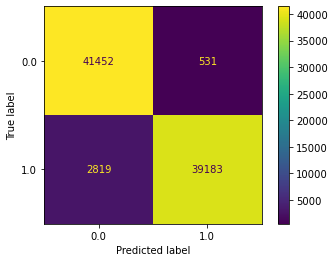

In [11]:
modelXGB = gsearch1.best_estimator_
ConfusionMatrixDisplay.from_estimator(modelXGB,X_testScaled,y_test)

In [13]:
param_test1 = {
 'max_depth':[3,4,5,6,7],
 'min_child_weight':[1,2,3]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',  scale_pos_weight=1, seed=27, use_label_encoder = False, tree_method = 'gpu_hist', eval_metric = 'logloss'), 
 param_grid = param_test1, scoring='roc_auc', cv=5)

gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=0,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                     

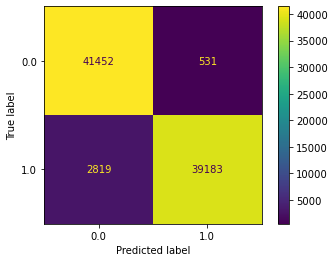

In [14]:
modelXGB = gsearch1.best_estimator_
ConfusionMatrixDisplay.from_estimator(modelXGB,X_test,y_test)

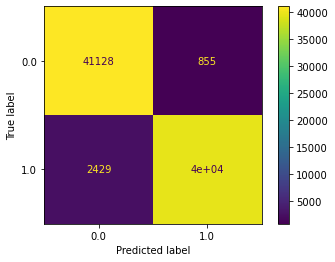

In [15]:
ConfusionMatrixDisplay.from_estimator(modelRF, X_test, y_test)

In [1]:
#Here we can save the model for later use
joblib.dump(modelRF, "modeloRF.joblib")

NameError: name 'joblib' is not defined